In [1]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# Load the latest version
ds = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "malaiarasugraj/global-health-statistics","Global Health Statistics.csv")

### Lagekennzahlen (Analyse der Prevalence Rate)

In [4]:
# Beispiel: Prevalence Rate (%)
s = ds["Prevalence Rate (%)"].dropna()

print("Mittelwert:", s.mean())
print("Median:", s.median())
print("Quantile (25%,50%,75%):", s.quantile([0.25,0.5,0.75]).to_dict())
print("Modus:", s.mode().tolist())

q_low, q_high = s.quantile(0.1), s.quantile(0.9)
trimmed = s[(s >= q_low) & (s <= q_high)].mean()
print("Trimmed Mean (10%):", trimmed)

Mittelwert: 10.04799186
Median: 10.04
Quantile (25%,50%,75%): {0.25: 5.09, 0.5: 10.04, 0.75: 15.01}
Modus: [15.87]
Trimmed Mean (10%): 10.051916822397217


### Streuung

In [5]:
print("Varianz:", s.var())
print("Standardabweichung:", s.std())
iqr = s.quantile(0.75) - s.quantile(0.25)
mad = (s - s.median()).abs().median()
print("IQR:", iqr)
print("MAD:", mad)

Varianz: 32.94977371754746
Standardabweichung: 5.740189345095461
IQR: 9.92
MAD: 4.960000000000001


### Ausreisserprüfung

##### Klassisch: Z-Score

In [6]:
z = (s - s.mean()) / s.std()
outliers_z = s[abs(z) > 3]
print("Anzahl Ausreisser (Z-Score >3):", len(outliers_z))

Anzahl Ausreisser (Z-Score >3): 0


##### Tukey-Fences:

In [7]:
q1, q3 = s.quantile(0.25), s.quantile(0.75)
iqr = q3 - q1
lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
outliers_tukey = s[(s < lo) | (s > hi)]
print("Anzahl Ausreisser (Tukey):", len(outliers_tukey))

Anzahl Ausreisser (Tukey): 0


##### Modifizierter Z-Score

In [8]:
median = s.median()
mad = (s - median).abs().median()
mod_z = 0.6745 * (s - median) / mad
outliers_modz = s[mod_z.abs() > 3.5]
print("Anzahl Ausreisser (mod. Z-Score >3.5):", len(outliers_modz))

Anzahl Ausreisser (mod. Z-Score >3.5): 0


### Verteilungsform (in VL3 genauer)

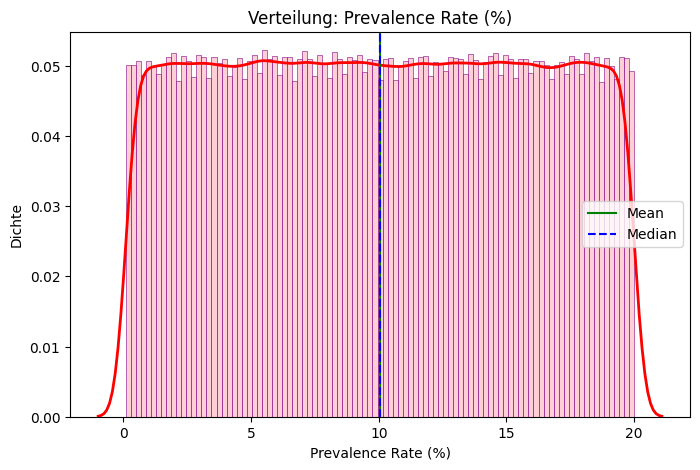

In [9]:
plt.figure(figsize=(8,5))

# Histogramm mit Dichte statt Counts
sns.histplot(s, bins="fd", stat="density", color="pink", edgecolor="purple")

# KDE separat in anderer Farbe
sns.kdeplot(s, color="red", lw=2)

# Mittelwert und Median einzeichnen
plt.axvline(s.mean(), color="green", linestyle="-", label="Mean")
plt.axvline(s.median(), color="blue", linestyle="--", label="Median")

plt.title("Verteilung: Prevalence Rate (%)")
plt.xlabel("Prevalence Rate (%)")
plt.ylabel("Dichte")
plt.legend()
plt.show()

### Anwendung auf alle Spaltengruppen

##### Raten (%)

In [10]:
rate_cols = ["Prevalence Rate (%)", "Incidence Rate (%)", "Mortality Rate (%)",
             "Recovery Rate (%)", "Healthcare Access (%)"]

for col in rate_cols:
    print("\n---", col, "---")
    s = ds[col].dropna()
    print("Mean:", s.mean(), "Median:", s.median(), "Std:", s.std())


--- Prevalence Rate (%) ---
Mean: 10.04799186 Median: 10.04 Std: 5.740189345095461

--- Incidence Rate (%) ---
Mean: 7.555005400000001 Median: 7.55 Std: 4.298946733063095

--- Mortality Rate (%) ---
Mean: 5.049918859999999 Median: 5.05 Std: 2.859426529277571

--- Recovery Rate (%) ---
Mean: 74.49693378999999 Median: 74.47 Std: 14.155168150475697

--- Healthcare Access (%) ---
Mean: 74.98783528 Median: 75.0 Std: 14.436345188760544


##### Ressourcen

In [11]:
resource_cols = ["Doctors per 1000", "Hospital Beds per 1000"]

for col in resource_cols:
    print("\n---", col, "---")
    s = ds[col].dropna()
    print("Mean:", s.mean(), "Median:", s.median(), "Std:", s.std())


--- Doctors per 1000 ---
Mean: 2.7479292199999996 Median: 2.75 Std: 1.2990665722141228

--- Hospital Beds per 1000 ---
Mean: 5.24593093 Median: 5.24 Std: 2.742865142233304


##### Finanzen

In [12]:
finance_cols = ["Average Treatment Cost (USD)", "Per Capita Income (USD)"]

for col in finance_cols:
    print("\n---", col, "---")
    s = ds[col].dropna()
    print("Mean:", s.mean(), "Median:", s.median(), "Std:", s.std())


--- Average Treatment Cost (USD) ---
Mean: 25010.313665 Median: 24980.0 Std: 14402.279227091667

--- Per Capita Income (USD) ---
Mean: 50311.099835 Median: 50372.0 Std: 28726.95935890379


##### Outcome & Lebensqualität

In [13]:
outcome_cols = ["DALYs", "Improvement in 5 Years (%)",
                "Education Index", "Urbanization Rate (%)"]

for col in outcome_cols:
    print("\n---", col, "---")
    s = ds[col].dropna()
    print("Mean:", s.mean(), "Median:", s.median(), "Std:", s.std())


--- DALYs ---
Mean: 2499.144809 Median: 2499.0 Std: 1443.9237975652616

--- Improvement in 5 Years (%) ---
Mean: 5.00259267 Median: 5.0 Std: 2.888298332864791

--- Education Index ---
Mean: 0.65006859 Median: 0.65 Std: 0.14447222593853798

--- Urbanization Rate (%) ---
Mean: 54.985212350000005 Median: 54.98 Std: 20.214042083888238
